# Part II - Ford GoBike System Data
### by Daniel Kiraithe


## Investigation Overview


This Project aimed to explore the factors that influence uptake of bikes in a bike sharing enterprise. It assesed some demographic and thematic issues that could shed some light. The key insigts revealed were as follows:
- There is generally a weak correlation among variables of the data set 
- Age is not a signficant factor when looking for bike users
- Other Gender and Female users take some of the longest trips
- The bike sharing business should adopt subscription approach as oppossed to customer approach


## Dataset Overview

Ford GoBike System Data is data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data is for the year 2019 meaning the basic user information such as age reflects that date. It contains some 183,412 trips taken during the period. The data set can be accessed from https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
data= pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()
bikes_df= pd.DataFrame(data)
# #### How many rows and columns are there in the dataset?

# In[4]:


bikes_df.shape


# #### There are 183,412 rows and 16 columns in the data set. 

# #### What is the description of the data types in the columns?

# In[6]:


bikes_df.info()


# #### The data structure has 7 data types of nature float, 7 objects, and 2 int meaning it is mostly numerical data

# #### Are there columns with missing values?

# In[7]:


bikes_df.isna().sum()


# #### There are several columns with missing values 

# ### Are there duplicated values in the data set?

# In[8]:


bikes_df.duplicated().sum()


# #### There are no duplicated data in the data set

# #### What is the descriptive statitics of the data set?

# In[9]:


bikes_df.describe()


# #### - The minimum duration in seconds is 61 seconds (almost 1 min) and the maximum us 85,444 (almost 24 ours)
# #### -The average trip duration in seconds is 726. seconds
# #### - There is need to clean some data columns and create new columns such as member Age and duration of trip columns to explore the data better

# #### Cleaning For Analysis

# In[15]:


# Filling missing values 
for na_val in ["end_station_id", "start_station_id", "start_station_name", "end_station_name", "member_birth_year"]:
    bikes_df[na_val] = bikes_df[na_val].fillna(bikes_df[na_val].mode()[0])


# In[16]:


# Testing results 
# Testing 
bikes_df.isna().sum()


# In[17]:


# Member gender is to be filled using mode
bikes_df.member_gender.mode()


# In[18]:


# Mode is male
# Fill missing values with male in the gender column
bikes_df["member_gender"] = bikes_df["member_gender"].fillna("Male")
# Testing 
bikes_df.isna().sum()


# In[19]:


# Gender data type should be cleaned 
bikes_df.member_gender = bikes_df.member_gender.astype('category')


# In[20]:


# User type data type needs to be cleaned
bikes_df.user_type = bikes_df.user_type.astype('category')


# In[22]:


# Start_time and end_time should be time data type
bikes_df.start_time = pd.to_datetime(bikes_df.start_time)
bikes_df.end_time = pd.to_datetime(bikes_df.end_time)


# In[23]:


# Testing 
bikes_df.info()


# In[57]:


# Creating a column for Member age 
bikes_df['member_age'] = 2019 - bikes_df['member_birth_year']
bikes_df.member_age = bikes_df.member_age.astype('int64')


# In[58]:


# Creating a column to visualize the trip length in minutes 
bikes_df['duration_min'] =bikes_df['duration_sec']/60 
#bikes_df.duration_min = bikes_df.duration_min.astype('int64')


# In[59]:


# Creating a column to visualize trip length in hours
bikes_df['duration_hrs'] =bikes_df['duration_sec']/3600 
#bikes_df.duration_hrs = bikes_df.duration_hrs.astype('int64')


# In[60]:


bikes_df.info()


# In[61]:


# member_age, duration_min, duration_hrs should all be  intenger data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
<class 'pandas.core.f

## Visualization 1


Majority of trips lasted more than 10 minutes but less than 20 minutes. 


Text(0.5,1,'Distribution of Trips by time in Minutes')

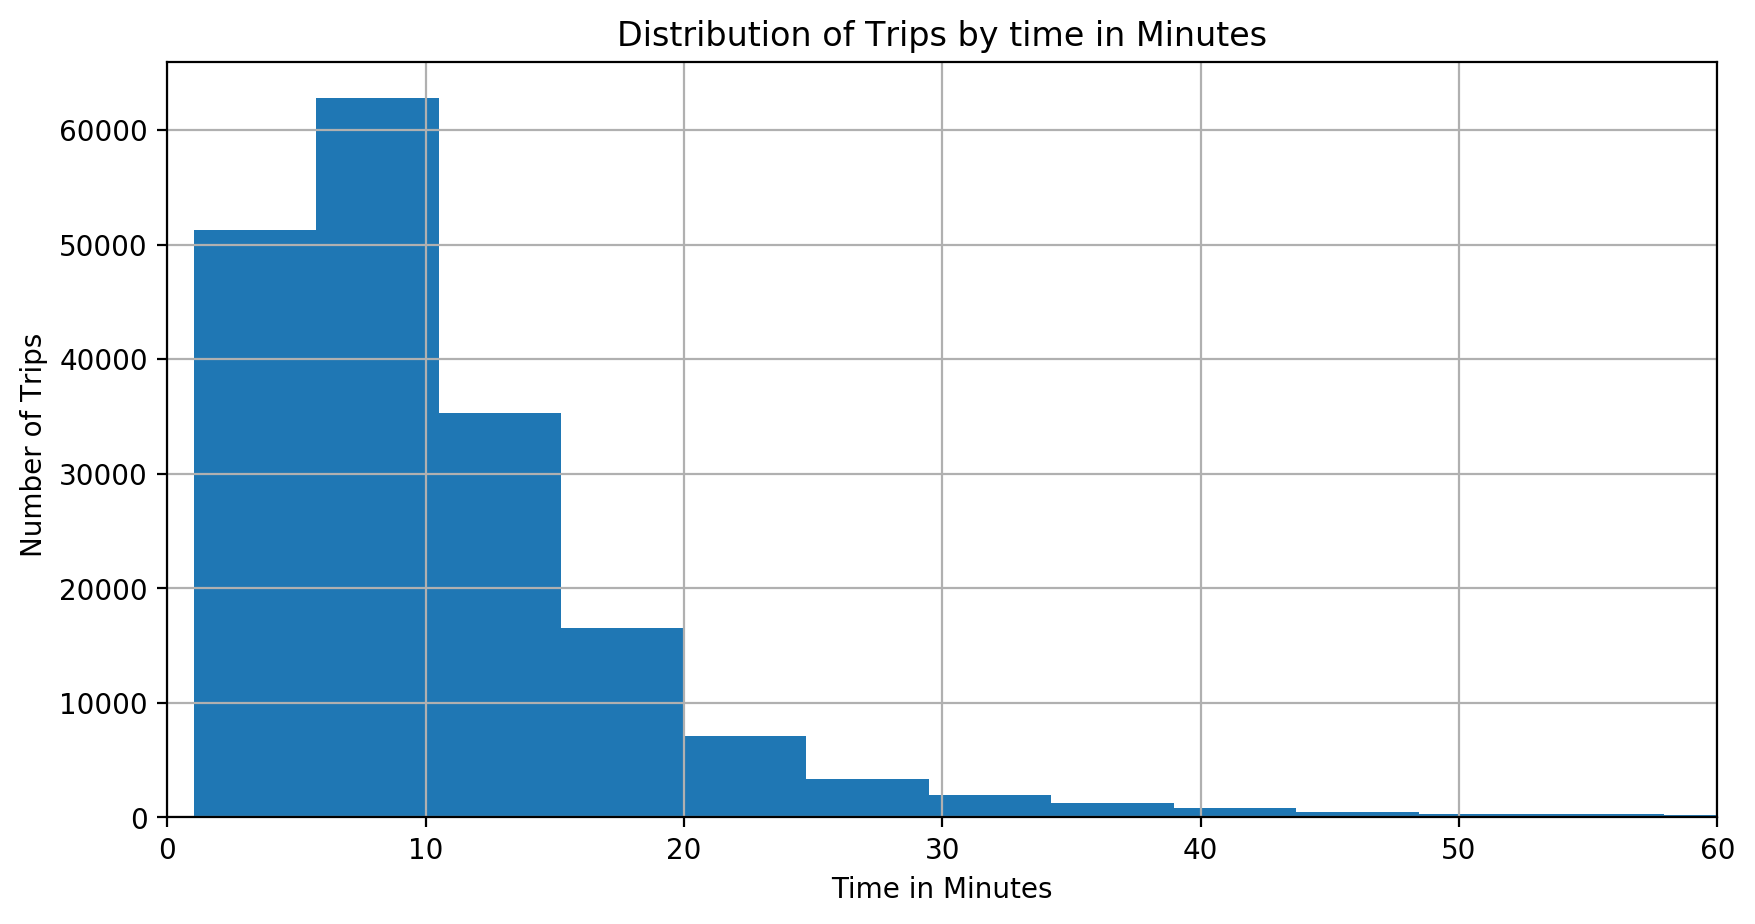

In [5]:
plt.figure(figsize = (10,5), dpi = 200)

bikes_df['duration_min'].hist(bins=300)
plt.xlim(0, 60)
plt.xlabel('Time in Minutes')
plt.ylabel('Number of Trips ')
plt.title("Distribution of Trips by time in Minutes")

## Visualization 2


Members age is left skewed. Majority members are between 25 and 35 years. The avearge age is 34 years witth a minimum age of 18 and maximum 141 years (outlier)

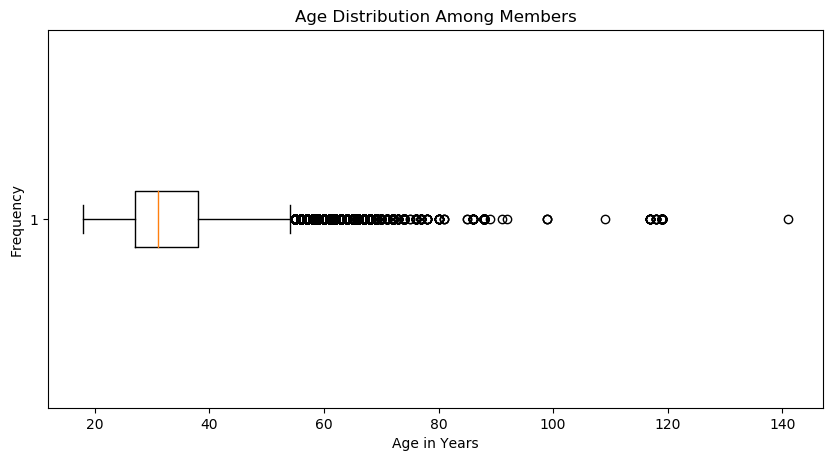

In [6]:
plt.figure(figsize = (10,5), dpi = 100)

plt.boxplot(bikes_df['member_age'], vert=False)

plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.title("Age Distribution Among Members")

plt.show()

## Visualization 3

There are almost 8 times subcribers as customers meaning subscription is likely to be more sustainable approach


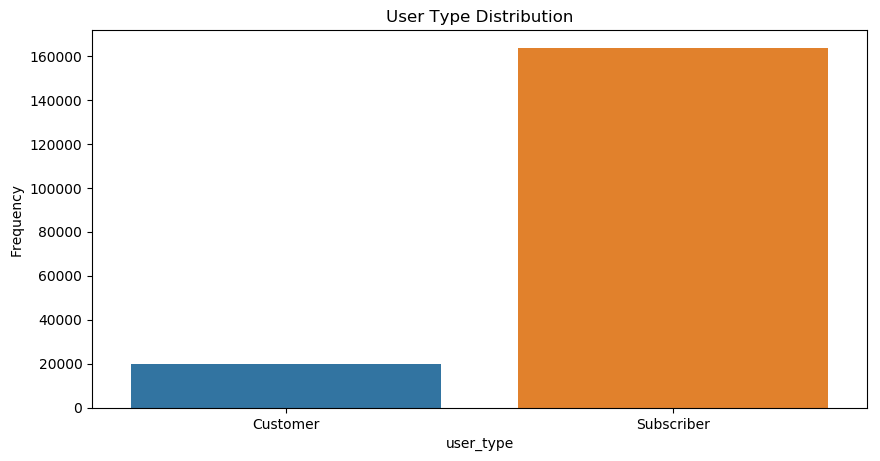

In [7]:
plt.figure(figsize = (10,5), dpi = 100)
plot = sb.countplot(data=bikes_df, x='user_type')
plt.xlabel('user_type')
plt.ylabel('Frequency')
plt.title("User Type Distribution")

plt.show()

## Visualization 4
Other Gender and Female users take some of the longest trips


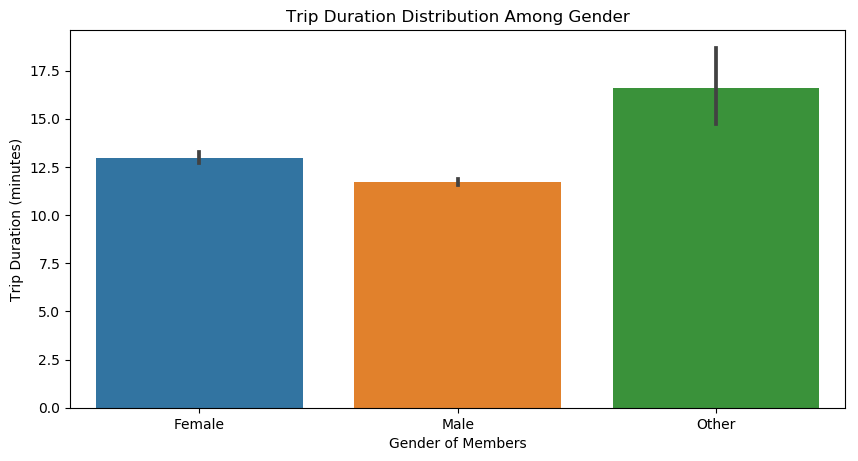

In [9]:
plt.figure(figsize = (10,5), dpi = 100)

sb.barplot(data = bikes_df, x = "member_gender", y = "duration_min")

plt.xlabel('Gender of Members')

plt.ylabel('Trip Duration (minutes)')


plt.title("Trip Duration Distribution Among Gender")

plt.show()

## Visualization 5

There is generally a weak correlation among variables of the data set

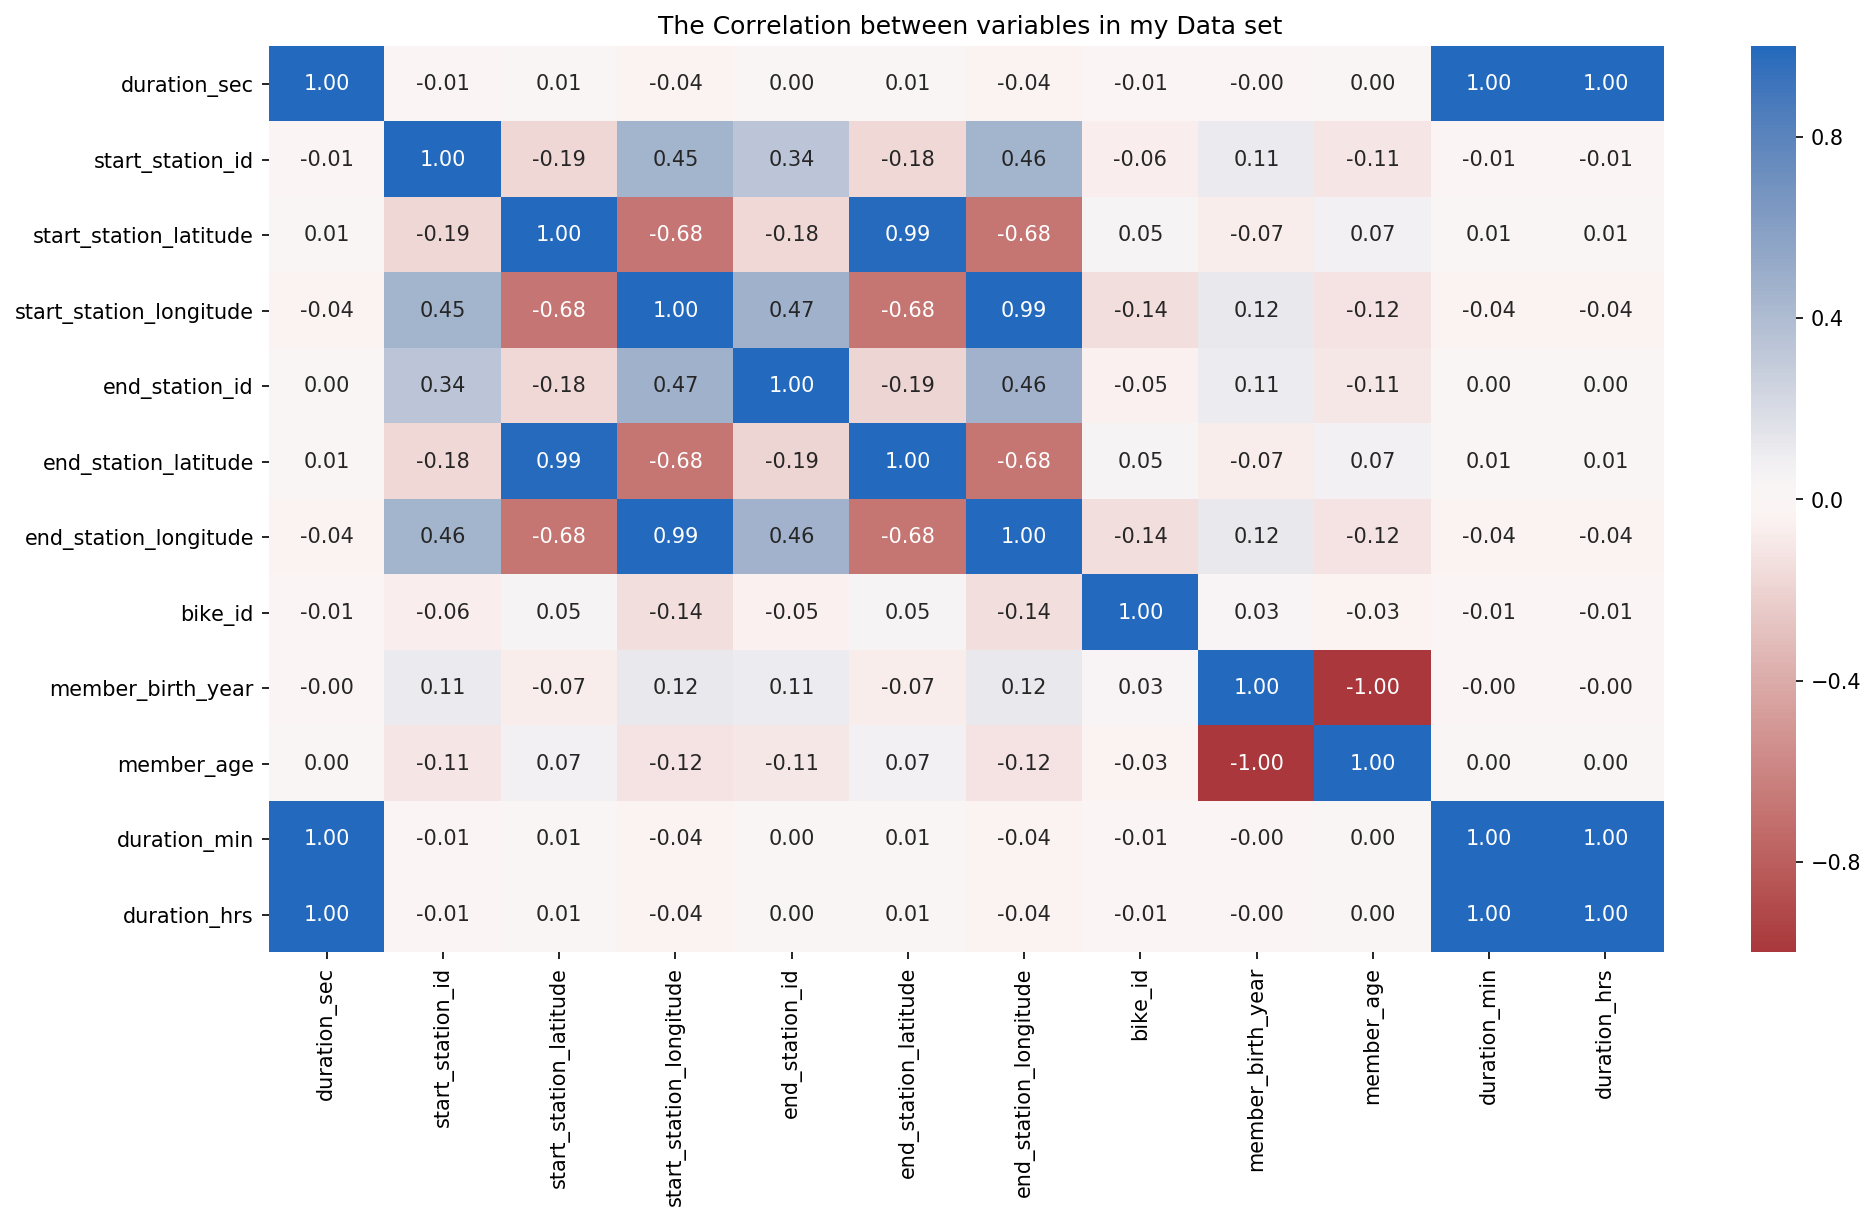

In [8]:
# Explaring the Corelation between all varriables in the data set visually
plt.figure(figsize = (15,8), dpi = 150)

sb.heatmap(bikes_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

plt.title(" The Correlation between variables in my Data set")

plt.xticks(rotation = 90)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


In [10]:
jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

SyntaxError: invalid syntax (<ipython-input-10-cd183d22b782>, line 1)